In [28]:
import math

# Assigment 1 forwad pass and backpropagation without using any library

x = [1,-1]
t = [1,0]

w = [[1,1,1],[-1,-1,-1]]
b = [0,0,0]

v = [[1,1],[-1,-1],[-1,-1]]
c = [0,0]


# forward pass

print(f"x: {x}")

# first layer
print(f"W: {w}")

k = [sum([x[i]*w[i][j] for i in range(len(x))]) + b[j] for j in range(len(b))]

print(f"k: {k}")

# sigmoid layer
z = [1/(1+math.exp(-k[i])) for i in range(len(k))]

print(f"z: {z}")

# second layer
print(f"V: {v}")

o = [sum([z[i]*v[i][j] for i in range(len(z))]) + c[j] for j in range(len(c))]

print(f"o: {o}")

# softmax layer
y = [math.exp(o[i])/sum([math.exp(o[j]) for j in range(len(o))]) for i in range(len(o))]

print(f"y: {y}")

# cross entropy loss
loss = -sum([t[i]*math.log(y[i]) for i in range(len(t))])

print(f"loss: {loss}")


x: [1, -1]
W: [[1, 1, 1], [-1, -1, -1]]
k: [2, 2, 2]
z: [0.8807970779778823, 0.8807970779778823, 0.8807970779778823]
V: [[1, 1], [-1, -1], [-1, -1]]
o: [-0.8807970779778823, -0.8807970779778823]
y: [0.5, 0.5]
loss: 0.6931471805599453


In [29]:
# backward pass
# derivative of loss function with respect to yi
dy = [(-1/y[i])*t[i] for i in range(len(y))]

print(f"dy: {dy}")

# derivative of loss function with respect to oi
do = [sum([dy[j] * (y[j]*(1-y[j]) if j==i else -y[j]*y[i]) for j in range(len(dy))]) for i in range(len(o))]

print(f"do: {do}")

# derivative of loss function with respect to v
dv = [[do[j]*z[i] for j in range(len(do))] for i in range(len(z))]

print(f"dv: {dv}")

# derivative of loss function with respect to ci
dc = [do[i]  for i in range(len(c))]

print(f"dc: {dc}")

# derivative of loss function with respect to zi
dz = [sum([do[j]*v[i][j] for j in range(len(do))]) for i in range(len(v))]

print(f"dz: {dz}")

# derivative of loss function with respect to ki
dk = [dz[i]*z[i]*(1-z[i]) for i in range(len(z))]

print(f"dk: {dk}")

# derivative of loss function with respect to wi
dw = [[dk[j]*x[i] for j in range(len(dk))] for i in range(len(x))]

print(f"dw: {dw}")

# derivative of loss function with respect to bi
db = [dk[i] for i in range(len(b))]

print(f"db: {db}")

dy: [-2.0, -0.0]
do: [-0.5, 0.5]
dv: [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
dc: [-0.5, 0.5]
dz: [0.0, 0.0, 0.0]
dk: [0.0, 0.0, 0.0]
dw: [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]
db: [0.0, 0.0, 0.0]


In [2]:
import math

class SimpleNeuralNetwork:
    def __init__(self, w, b, v, c):
        # Initialize weights and biases
        self.w = w
        self.b = b
        self.v = v
        self.c = c
    

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def forward_pass(self, x):
        # First layer
        k = [sum(x[i] * self.w[i][j] for i in range(len(x))) + self.b[j] for j in range(len(self.b))]
        # Sigmoid layer
        z = [self.sigmoid(k[i]) for i in range(len(k))]
        # Second layer
        o = [sum(z[i] * self.v[i][j] for i in range(len(z))) + self.c[j] for j in range(len(self.c))]
        # Softmax layer
        y = [math.exp(o[i]) / sum(math.exp(o[j]) for j in range(len(o))) for i in range(len(o))]
        return y, z, k, o

    def compute_loss(self, y, t):
        return -sum(t[i] * math.log(y[i]) for i in range(len(t)))

    def backward_pass(self,t, y, o, z, x):
        # Derivatives of the loss function
        # derivative of loss function with respect to yi
        dy = [(-t[i] / y[i]) for i in range(len(y))]

        # derivative of loss function with respect to oi
        do = [sum([dy[j] * (y[j]*(1-y[j]) if j==i else -y[j]*y[i]) for j in range(len(dy))]) for i in range(len(o))]
        #do = [dy[j] * (y[j]*(1-y[j]))  for j in range(len(dy))]) for i in range(len(o))]

        # derivative of loss function with respect to v
        dv = [[do[j]*z[i] for j in range(len(do))] for i in range(len(z))]

        # derivative of loss function with respect to ci
        dc = [do[i]  for i in range(len(c))]

        # derivative of loss function with respect to zi
        dz = [sum([do[j]*self.v[i][j] for j in range(len(do))]) for i in range(len(self.v))]

        # derivative of loss function with respect to ki
        dk = [dz[i]*z[i]*(1-z[i]) for i in range(len(z))]

        # derivative of loss function with respect to wi
        dw = [[dk[j]*x[i] for j in range(len(dk))] for i in range(len(x))]

        # derivative of loss function with respect to bi
        db = [dk[i] for i in range(len(b))]

        return dw, db, dc, dv
    def update_weights(self, dw, db,dc, dv, learning_rate=0.1):
        # Update the weights and biases using the learning rate
        for i in range(len(self.w)):
            for j in range(len(self.w[i])):
                self.w[i][j] -= learning_rate * dw[i][j]
        
        for i in range(len(self.b)):
            self.b[i] -= learning_rate * db[i]

        for i in range(len(self.v)):
            for j in range(len(self.v[i])):
                self.v[i][j] -= learning_rate * dv[i][j]

        for i in range(len(self.c)):
            self.c[i] -= learning_rate * dc[i]

    def train(self, xtrain, ytrain, epochs, learning_rate=0.1):
        for epoch in range(epochs):
            total_loss = 0
            for index,(x, t) in enumerate(zip(xtrain, ytrain)):
                y, z, k, o = self.forward_pass(x)
                loss = self.compute_loss(y, t)
                dw, db, dc, dv = self.backward_pass(t, y, o, z, x)
                # if is first run print derivative
                if epoch == 0 and index == 0:
                    print(f"dw: {dw}")
                    print(f"db: {db}")
                    print(f"dc: {dc}")
                    print(f"dv: {dv}")
                self.update_weights(dw, db, dc, dv, learning_rate=learning_rate)
                total_loss += loss
            avg_loss = total_loss / len(xtrain)
            print(f"Epoch {epoch + 1}, Average Loss: {avg_loss}")
            
    def validate(self, xval, yval):
        total_loss = 0
        correct_predictions = 0
        for x, t in zip(xval, yval):
            y, _, _, _ = self.forward_pass(x)

            # Predicted class is the one with the highest probability
            predicted_class = y.index(max(y))

            # Actual class is the one with the highest value in the target vector
            actual_class = t.index(max(t))

            # Increment correct predictions if the classes match
            if predicted_class == actual_class:
                correct_predictions += 1

            loss = self.compute_loss(y, t)
            total_loss += loss

        avg_loss = total_loss / len(xval)
        accuracy = correct_predictions / len(xval)
        return avg_loss, accuracy

# Example usage
x = [[1, -1], [-1, 1]]
t = [[1, 0], [0, 1]]
w = [[1, 1, 1], [-1, -1, -1]]
b = [0, 0, 0]
v = [[1, 1], [-1, -1], [-1, -1]]
c = [0, 0]
nn = SimpleNeuralNetwork(w, b, v, c)
nn.train(x, t, 100)



do: [-0.5, 0.5]
dw: [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]
db: [0.0, 0.0, 0.0]
dc: [-0.5, 0.5]
dv: [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
do: [0.5328272291956112, -0.532827229195611]
Epoch 1, Average Loss: 0.7271016556975978
do: [-0.4519930331006713, 0.45199303310067135]
do: [0.5347375694051797, -0.5347375694051797]
Epoch 2, Average Loss: 0.6833104722571401
do: [-0.4126685279985708, 0.41266852799857084]
do: [0.5339379474201416, -0.5339379474201416]
Epoch 3, Average Loss: 0.6478012119807957
do: [-0.38046160984162136, 0.38046160984162136]
do: [0.5310247357396092, -0.5310247357396092]
Epoch 4, Average Loss: 0.6179929318115058
do: [-0.35390369545011857, 0.3539036954501185]
do: [0.5264692136777775, -0.5264692136777775]
Epoch 5, Average Loss: 0.5921725289488446
do: [-0.3317714750903831, 0.33177147509038296]
do: [0.5206412550550625, -0.5206412550550624]
Epoch 6, Average Loss: 0.5692155385385275
do:

In [31]:
# print weights and biases of the network
print(f"w: {nn.w}")
print(f"b: {nn.b}")
print(f"v: {nn.v}")
print(f"c: {nn.c}")

w: [[1.3190182013711846, 1.3190182013711844, 1.3190182013711844], [-1.3190182013711846, -1.3190182013711844, -1.3190182013711844]]
b: [-0.10298842004189203, -0.102988420041892, -0.102988420041892]
v: [[1.9765982502944903, 0.02340174970551011], [-0.023401749705510153, -1.9765982502944905], [-0.023401749705510153, -1.9765982502944905]]
c: [-1.2382454716823024, 1.2382454716823015]


## Training over synth data

In [32]:
from data import load_synth

# Load the synthetic dataset
(xtrain, ytrain), (xval, yval), num_cls = load_synth()


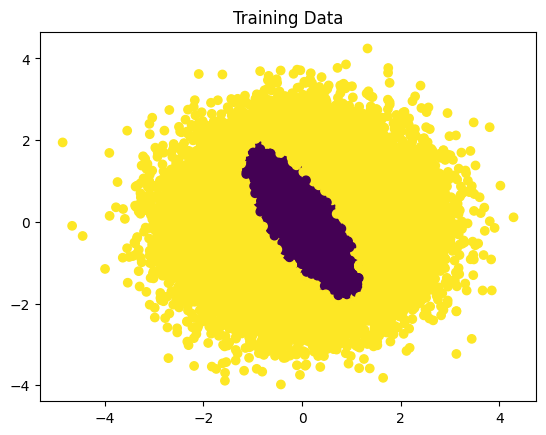

In [33]:
#plot the data
import matplotlib.pyplot as plt

plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain)
plt.title("Training Data")
plt.show()


In [34]:
xtrain

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       ...,
       [-1.48486162,  0.46215981],
       [ 1.54902516,  2.53170549],
       [-0.03572203,  0.17320019]])

In [35]:
import numpy as np

def remove_data_points_with_outliers(data, target):
    # Convert the data to a NumPy array for easier manipulation
    data_array = np.array(data)
    target_array = np.array(target)

    #data_array = data

    # Calculate the first and third quartiles and IQR for each feature
    Q1 = np.percentile(data_array, 15, axis=0)
    Q3 = np.percentile(data_array, 85, axis=0)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify rows that do not contain outliers in any feature
    non_outlier_rows = ~((data_array < lower_bound) | (data_array > upper_bound)).any(axis=1)

    # Filter and return the data
    filtered_data = data_array[non_outlier_rows]
    filtered_target = target_array[non_outlier_rows]

    # print the number of removed rows
    print(f"Number of removed rows: {len(data_array) - len(filtered_data)}")

    return filtered_data, filtered_target



In [36]:
xtrain_filtered, ytrain_filtered = remove_data_points_with_outliers(xtrain, ytrain)

Number of removed rows: 5


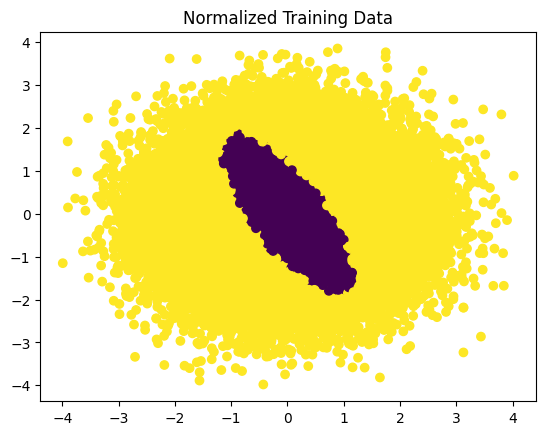

In [37]:
# plot the filtered data
plt.scatter(xtrain_filtered[:, 0], xtrain_filtered[:, 1], c=ytrain_filtered)
plt.title("Normalized Training Data")
plt.show()


In [38]:
# Example of printing sample data
def print_sample_data(data, labels, num_samples=5):
    print("Sample data:")
    for i in range(num_samples):
        print(f"Input: {data[i]}, Label: {labels[i]}")

print_sample_data(xtrain, ytrain)


Sample data:
Input: [1.76405235 0.40015721], Label: 1
Input: [0.97873798 2.2408932 ], Label: 1
Input: [ 1.86755799 -0.97727788], Label: 1
Input: [ 0.95008842 -0.15135721], Label: 1
Input: [-0.10321885  0.4105985 ], Label: 0


In [39]:
def min_max_normalize(data):
    # Calculate min and max for each column (feature)
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)

    # Normalize each feature
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data, min_vals, max_vals


def min_max_normalize_other(data, min_vals, max_vals):
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data

In [40]:
# Normalize the training data
xtrain_normalized, min_vals, max_vals = min_max_normalize(xtrain_filtered)

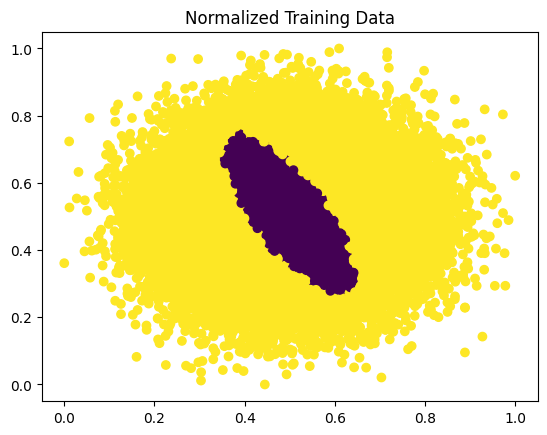

In [41]:
# plot the normalized data
plt.scatter(xtrain_normalized[:, 0], xtrain_normalized[:, 1], c=ytrain_filtered)
plt.title("Normalized Training Data")
plt.show()


In [52]:
# convert ytrain to one-hot encoding
def one_hot_encode(data, num_cls):
    encoded_data = []
    for value in data:
        encoded_value = [0] * num_cls
        encoded_value[value] = 1
        encoded_data.append(encoded_value)
    return encoded_data

In [64]:
import random
# Set the weights to random normal values between -1 and 1 and biases to 0
w = [[random.uniform(-1, 1) for _ in range(3)] for _ in range(2)]
b = [0, 0, 0]
v = [[random.uniform(-1, 1) for _ in range(2)] for _ in range(3)]
c = [0, 0]

print(f"w: {w}")
print(f"b: {b}")
print(f"v: {v}")
print(f"c: {c}")


w: [[0.14390780427790295, 0.2833819027085309, 0.21726045942871441], [0.17217752719346024, 0.82856470729356, 0.08995460680291645]]
b: [0, 0, 0]
v: [[0.8469359594255477, 0.38102693995632997], [-0.9761154030718955, -0.4690514881895842], [0.11049089228654396, -0.8845337727044731]]
c: [0, 0]


In [68]:


synth_nn = SimpleNeuralNetwork(w, b, v, c)

synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain_filtered.tolist(), num_cls), 5, learning_rate=1)
synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain_filtered.tolist(), num_cls), 5, learning_rate=0.9)
synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain_filtered.tolist(), num_cls), 5, learning_rate=0.8)
synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain_filtered.tolist(), num_cls), 5, learning_rate=0.7)
synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain_filtered.tolist(), num_cls), 5, learning_rate=0.6)
synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain_filtered.tolist(), num_cls), 5, learning_rate=0.5)
synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain_filtered.tolist(), num_cls), 5, learning_rate=0.4)


dw: [[-2.5750858778571232e-43, 2.3877450490790523e-17, -6.889185235544615e-20], [-2.004415951907427e-43, 1.8585920984680974e-17, -5.362459132144298e-20]]
db: [-3.584059698469097e-43, 3.32331471902009e-17, -9.588515618186215e-20]
dc: [0.0011349286381078924, -0.0011349286381079349]
dv: [[3.991640135219799e-44, -3.991640135219949e-44], [3.3655761444321724e-18, -3.3655761444322987e-18], [6.82135143324238e-21, -6.821351433242634e-21]]
Epoch 1, Average Loss: 0.22245325501818705
Epoch 2, Average Loss: 0.22307121790587855
Epoch 3, Average Loss: 0.22267614437914224
Epoch 4, Average Loss: 0.22081626520719128
Epoch 5, Average Loss: 0.22051403111252202
dw: [[-1.7831922906924136e-42, 3.608531624196378e-17, -1.402884883260395e-22], [-1.3880154846550457e-42, 2.808837721761974e-17, -1.0919887615697388e-22]]
db: [-2.4818852367789162e-42, 5.0224316307834837e-17, -1.952565238666608e-22]
dc: [0.00648379165763847, -0.006483791657638572]
dv: [[2.307763466265058e-43, -2.3077634662650947e-43], [5.760007723863

## Tensor Backpropagation

In [47]:
len(ytrain_filtered.tolist())

59995

In [ ]:
import matplotlib.pyplot as plt

img = x_train[0,:].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b = np.zeros(hidden_size)
        self.V = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.c = np.zeros(output_size)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        k = np.dot(X, self.W1) + self.b1
        z = self.sigmoid(self.z1)
        o = np.dot(self.a1, self.W2) + self.b2
        y = self.softmax(self.z2)
        return k, z, o, y

    def compute_loss(self, y_true, y_pred):
        logloss = -np.sum(y_true * np.log(y_pred))
        return logloss

    def backward(self, t, y, o, z, k, X):
        # derivatives with tensor backpropagation
        do = (y - t)

        # derivative of loss function with respect to v
        dv = np.dot(z.T, do)

        assert dv.shape == self.V.shape, "dv shape mismatch"

        # derivative of loss function with respect to ci
        dc = do.deepcopy()

        assert dc.shape == self.c.shape, "dc shape mismatch"

        # derivative of loss function with respect to zi
        dz = np.dot(do, self.V.T) #wrong

        assert dz.shape == z.shape, "dz shape mismatch"

        # derivative of loss function with respect to ki
        dk = dz * z * (1 - z)
        


        
        
        

       

# Example usage
nn = NeuralNetwork(input_size=784, hidden_size=300, output_size=10, learning_rate=0.01)

# Load MNIST data here

# Training loop
# for epoch in range(epochs):
#     for X_batch, y_batch in minibatches:
#         # Forward pass
#         outputs = nn.forward(X_batch)
#         # Compute loss
#         loss = nn.compute_loss(y_batch, outputs)
#         # Backward pass and update parameters
#         nn.backward(X_batch, y_batch, outputs)
